In [1]:
from matplotlib import pyplot as plt
import numpy as np
import csv
import math
import pandas as pd
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix
from sklearn import metrics

def add_ones_left(df):
    left_ones = np.ones(df.shape[0])
    df['ones'] = left_ones

    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]    
    return df

### Import data

In [2]:
# Data import
X_train = pd.read_csv('har_smartphone/X_train.txt', delimiter = '\s+', header = None)
X_test = pd.read_csv('har_smartphone/X_test.txt', delimiter = '\s+', header = None)
y_train_data = pd.read_csv('har_smartphone/y_train.txt', delimiter = '\s+', header = None)
y_test_data = pd.read_csv('har_smartphone/y_test.txt', delimiter = '\s+', header = None)

X_train = np.array(X_train)
X_test = np.array(X_test)

# Number of classes
N_CLASSES = 6

# One-hot encoding
y_train = np.zeros([y_train_data.shape[0], N_CLASSES])
for idx, v in enumerate(y_train_data[0]):
    y_train[idx, v-1] = 1

y_test = np.zeros([y_test_data.shape[0], N_CLASSES])
for idx, v in enumerate(y_test_data[0]):
    y_test[idx, v-1] = 1

### Define distance measure and voting logic

In [3]:
def euclideanDistance(element, X_train):
    v_dist = []
    for i in range(X_train.shape[0]):
        distance = 0
        for j in range(X_train.shape[1]):
            distance += pow(element[j] - X_train[i,j], 2)
        v_dist.append(np.sqrt(distance))  
    return v_dist

def votes(dist, k, y_train):
    
    # Get k smallest distance indexes
    ind = np.argpartition(dist, k)[:k]
    
    # Classes
    classes = y_train.shape[1]
    
    # Voting vector
    votes =  np.zeros(classes)
    
    # Sum with one-hot encoding
    for ix in ind:
        votes += y_train[ix]
    
    # Get max votes idx
    winner = np.argmax(votes)+1
        
    return winner
        

### Main loop

In [8]:
k = 7
aux = len(y_test)
y_pred = np.zeros(aux)
total = len(y_test[:aux])
acc = 0
for i, elem in enumerate(X_test[:aux]):

    start_time = time.time()

    # Get distances
    dist = euclideanDistance(elem, X_train)
    
    # Get winner class
    winner = votes(dist, k, y_train)
    y_pred[i] = winner
    
    # Parcial accuracy
    if np.equal(y_pred[i], np.argmax(y_test[i])+1):
        acc += 1
        
    # Expected time to finish (ttf)
    end_time = time.time()
    interval = end_time - start_time
    ttf = (total-(i+1))*interval
    
    # Print
    print('\r Processed: {0:.2f}% - Partial accuracy: {1:.2f}% - TTF: {2:.0f}s'.format((i+1)/total*100, acc/(i+1)*100, ttf) , end='')    

 Processed: 100.00% - Partial accuracy: 90.33% - TTF: 0s

### Accuracy and F1 Score

In [10]:
y_test_pred = np.argmax(y_test[:aux], axis=1)+1
acc = np.equal(y_pred, y_test_pred).mean()
print('Accuracy: {0:.2f}'.format(acc*100))

# F1 Score
print('F1 Score: {}'.format(f1_score(y_pred, y_test_pred, average='weighted')))

Accuracy: 90.33
F1 Score: 0.9040288107520914


### Confusion Matrix

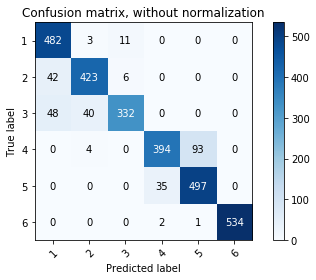

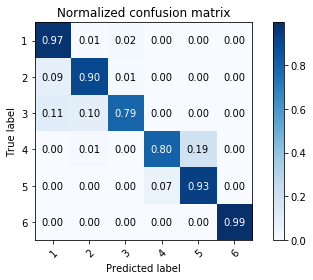

In [11]:
# Confusion matrix
normalize = False
cm = confusion_matrix(y_test_pred, y_pred)
cmap = plt.cm.Blues
classes = ['1', '2', '3', '4', '5', '6']

for normalize in [False, True]:

    # Normalization
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

### kNN for another k

In [12]:
k = 11
aux = len(y_test)
y_pred_2 = np.zeros(aux)
total = len(y_test[:aux])
acc2 = 0
for i, elem in enumerate(X_test[:aux]):

    start_time = time.time()

    # Get distances
    dist = euclideanDistance(elem, X_train)
    
    # Get winner class
    winner = votes(dist, k, y_train)
    y_pred_2[i] = winner
    
    # Parcial accuracy
    if np.equal(y_pred[i], np.argmax(y_test[i])+1):
        acc += 1
        
    # Expected time to finish (ttf)
    end_time = time.time()
    interval = end_time - start_time
    ttf = (total-(i+1))*interval
    
    # Print
    print('\r Processed: {0:.2f}% - Partial accuracy: {1:.2f}% - TTF: {2:.0f}s'.format((i+1)/total*100, acc/(i+1)*100, ttf) , end='')    

 Processed: 100.00% - Partial accuracy: 90.36% - TTF: 0s

### Accuracy and F1 Score

In [15]:
y_test_pred = np.argmax(y_test[:aux], axis=1)+1
acc = np.equal(y_pred_2, y_test_pred).mean()
print('Accuracy: {0:.2f}'.format(acc*100))

# F1 Score
print('F1 Score: {}'.format(f1_score(y_pred_2, y_test_pred, average='weighted')))

Accuracy: 90.46
F1 Score: 0.9055700314596505


### Confusion matrix

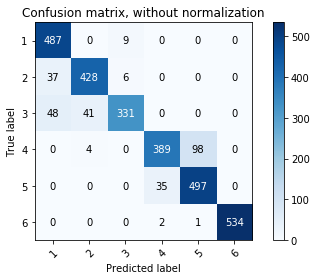

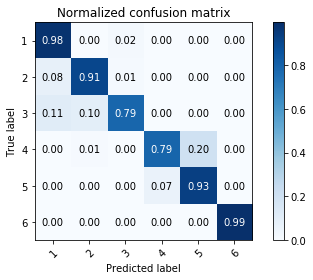

In [14]:
# Confusion matrix
normalize = False
cm = confusion_matrix(y_test_pred, y_pred_2)
cmap = plt.cm.Blues
classes = ['1', '2', '3', '4', '5', '6']

for normalize in [False, True]:

    # Normalization
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()